Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



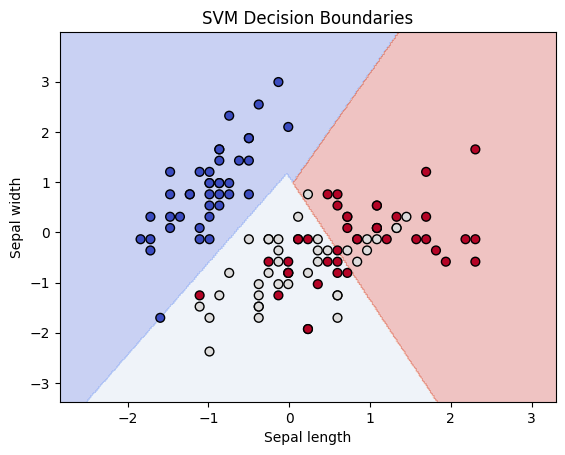

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (only 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]   # Only first two features: Sepal length & Sepal width
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # it fits the data meaning it calculates the mean and std deviation, then transforms the data. 
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', C=1.0) #C = 1.0 means this allowe misclassification, and doesn't penalize heavily, but it might cause underfitting issues.
svm_model.fit(X_train, y_train) 

# Predict and evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize decision boundaries
def plot_decision_boundaries(X, y, model):
    # Create mesh grid
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title("SVM Decision Boundaries")
    plt.show()

# Visualize on training data
plot_decision_boundaries(X_train, y_train, svm_model)


In [5]:
# My own code for SVM 
from sklearn import svm
X = [[0,0], [1,1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X,y)
# SVC()

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
clf.predict([[2,2]])  # Example prediction

array([1])

In [7]:
clf.predict([[1,2]])  # Example prediction

array([1])

In [8]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
X, y = make_classification(n_samples=10, random_state=0)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)
# predict on training examples
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)


array([0, 1, 0])

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.array([[1.0, 2.0], [3.0, 6.0], [5.0, 10.0]])

scaler = StandardScaler()

# Option 1: Separate fit and transform
scaler.fit(data)
scaled1 = scaler.transform(data)

# Option 2: Combined
scaled2 = scaler.fit_transform(data)

print(scaled1)
print(scaled2)  # Both will be same

[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


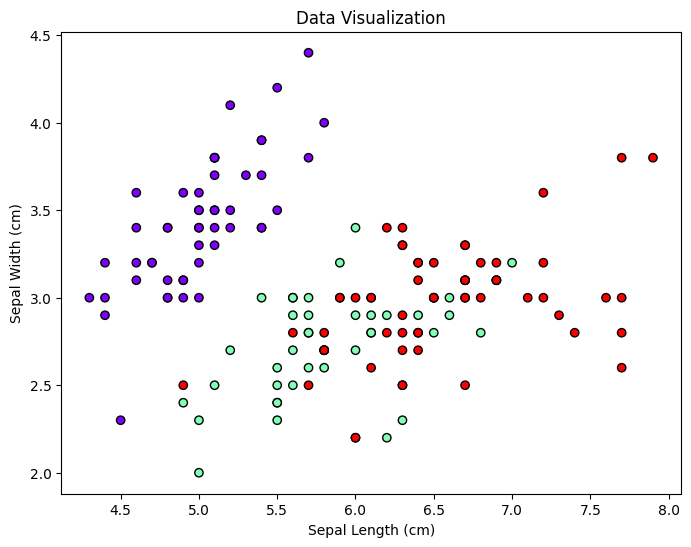

In [24]:
# why are we using 'Linear' kernel ? - using linear kernel because the data is linearly separable, meaning we can draw a straight line to separate the classes.
#lets visualize the data to see if it is linearly separable.
import matplotlib.pyplot as plt
iris = datasets.load_iris()
data = iris.data[:, :2] 
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=iris.target, cmap='rainbow', edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Data Visualization')
plt.show()

In [1]:
#imports 

import numpy as np 
import pennylane as qml
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler      
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.metrics import accuracy_score 

In [2]:
X, y = load_iris(return_X_y=True)

In [4]:
X = X[:100, :]   # 150 samples, taking just 100 samples for binary classification
y = y[:100] # first 100 samples for binary classification


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.5 , random_state=42)
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train) # it fits the data meaning it calculates the mean
X_test = scaler.transform(X_test) # we don't have to fit the test data, we just transform it using the mean and std deviation calculated from the training data
X_test = np.clip(X_test , 0,1) 


In [5]:
num_qubits = 4
device = qml.device("default.qubit", wires=num_qubits)

In [6]:
@qml.qnode(device)
def qkernel_circuit(a,b): 
    qml.AngleEmbedding(features = a, wires = range(num_qubits), rotation = 'X') # this was the circuit phi 
    qml.adjoint(qml.AngleEmbedding(features = b, wires = range(num_qubits), rotation = 'X')) # this was the circuit phi dagger
    return qml.probs(wires=range(num_qubits))

In [11]:
def qkernel(A,B): 
    return np.array([qkernel_circuit(a,b)[0] for a in A for b in B]).reshape(len(A), len(B))

In [12]:
qsvm = SVC(kernel=qkernel, C=1.0)#C = 1.0 means this allowe misclassification, and doesn't penalize heavily, but it might cause underfitting issues.
qsvm.fit(X_train, y_train)

,C,1.0
,kernel,<function qke...x7fdccd071800>
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
y_pred = qsvm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0
